# Semana 7 do Aceleradev DS Codenation

### Professor: Túlio Vieira de Souza | Tema: Modelagem e Regressão

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset: House Pricing from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [4]:
df = pd.read_csv('train.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Vamos escolher as colunas com mais de 100% de completude

In [57]:
colunas_usaveis = df.isna().sum() / df.shape[0] == 0

Vamos obter as variáveis numéricas, mas somente as colunas

In [61]:
var_numericas = [i for i in df.loc[:, colunas_usaveis] if df[i].dtype != 'object']

Vamos encontrar as variáveis com maior correlação com nosso *target* `SalePrice`

In [62]:
y_treino = df['SalePrice']

In [63]:
x_treino = df[var_numericas].drop(columns='SalePrice')

In [64]:
from yellowbrick.target import FeatureCorrelation

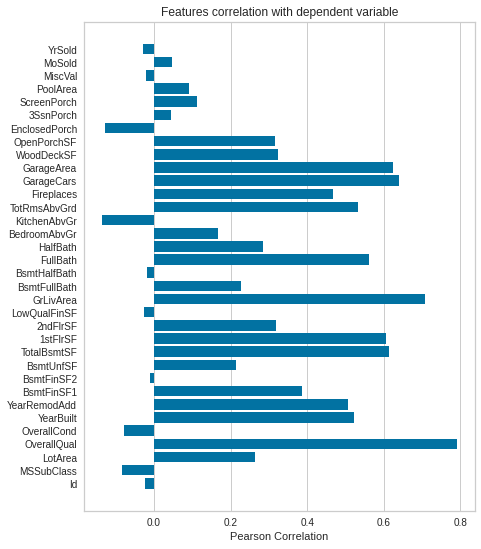

In [67]:
plt.figure(figsize=(7, 9))
correlaciona = FeatureCorrelation(labels=x_treino.columns)
correlaciona.fit(x_treino, y_treino)
correlaciona.show();

Descobrimos que as duas variáveis mais correlacionadas com `SalePrice` são: `OverallQual` e `GrLivArea`. Vamos olhar

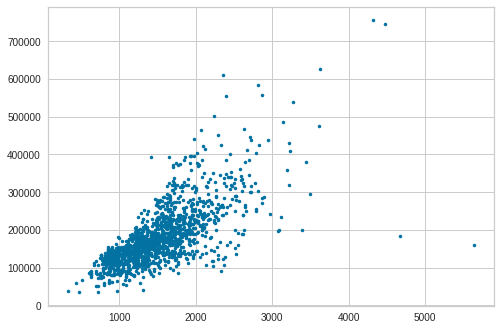

In [69]:
plt.plot(df['GrLivArea'], y_treino, '.')
plt.show()

Uma maneira arbitrária de tentar gerar uma função que descreva os dados, é fazer uma reta a olho. Eu sei que parece grotesco, mas o objetivo disso é entendermos que nós podemos **enviesar** um modelo, seja gerando uma curva "à olho", ou tentando modelar uma distribuição não linear com uma regressão linear